# Linear Regression in Python


Linear regression is a technique to model the relationship between two or more variables. One definition is as follows:

```
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

....

The most common method for fitting a regression line is the method of least-squares. This method calculates the best-fitting line for the observed data by minimizing the sum of the squares of the vertical deviations from each data point to the line (if a point lies on the fitted line exactly, then its vertical deviation is 0). Because the deviations are first squared, then summed, there are no cancellations between positive and negative values.

```

[Source: http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm)


### Tutorial Overview

In today's tutorial, we will cover basics of downloading and loading data in Python, running basic descriptive statistics and figures, as well as running simple OLS or ordinary least squares regression models. The output of these models could be used to estimate an unknown outcome given several parameters. Examples of this will be shown below.


### Background Material

Besides the material covered in this tutorial, you may want some additional background on the basics of Jupyter Notebooks and basic usage of data analysis in Python using Pandas:

[Using Jupyter and Pandas Tutorial](http://jmausolf.github.io/code/Using_Pandas_in_Python/)



---

# Downloading Data

In Python, there are a number of ways to download data. Below, I show examples of downloading a zip_fie from the General Social Survey as well as another already created .CSV file of the GSS survey stored elsewhere on the web. 

For the curious, entire scripts can be written to download, clean, and iterate through datasets from a number of sources:

[Advanced Download Example Code](https://github.com/jmausolf/police_ois_matching/blob/master/download.py)

Basic Download Examples Below:

In [1]:
#Import Packages
import wget
import pandas as pd
from glob import glob
import zipfile

#Turn of Notebook Package Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Example of Downloading the Data and Extract Stata DTA File
! rm *.csv
! rm *.zip
! rm*.DTA

#Use Curl to Fetch a File
!curl -O http://gss.norc.org/Documents/stata/2016_stata.zip

#Unzip a File  
def unzip(zipfilename, subfilename="", rename=""):
    with zipfile.ZipFile(zipfilename,"r") as zip_ref:
        zip_ref.extract(subfilename, ".")
        if rename !="":os.rename(subfilename, rename)
            
unzip('2016_stata.zip', 'GSS2016.DTA')



rm: *.csv: No such file or directory
/bin/sh: rm*.DTA: command not found
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1109k  100 1109k    0     0   762k      0  0:00:01  0:00:01 --:--:--  764k


In [3]:
#Alternative to Curl is Wget
#Download a CSV Stored on the Web
wget.download('https://raw.githubusercontent.com/jmausolf/Python_Tutorials/master/Machine_Learning/data/gss2014.csv')

'gss2014.csv'

In [ ]:
! ls


# EXPLORATORY DATA ANALYSIS WITH PANDAS

[Pandas](http://pandas.pydata.org/) is a library created by [Wes McKinney](http://blog.wesmckinney.com/) that introduces the R-like dataframe object to Python and makes working with data in Python a lot easier. It's also a lot more efficient than the R dataframe and pretty much makes Python superior to R in every imaginable way (except for ggplot 2).

We start by importing the libraries we're going to use: `pandas` and `matplotlib`.



### LOAD THE DATA WITH PANDAS

In [5]:
# Define Data
df = pd.read_csv('gss2014.csv', index_col=0).reset_index()


### VIEW THE DATA IN PANDAS

There are lots of options for viewing data in pandas. Just like we did in the command line, you can use `head` and `tail` to get a quick view of our data.

In [6]:
df.head()

,prestg10,sppres10,papres10,mapres10,prestg105plus,sppres105plus,papres105plus,mapres105plus,sei10,spsei10,...,partyid_na,partyid_dk,partyid_strdem,partyid_dem,partyid_ind_dem,partyid_ind,partyid_ind_rep,partyid_rep,partyid_str_rep,partyid_other
0,53,-1,-1,45,75,-1,-1,55,59.1,-1.0,...,0,0,0,0,0,0,0,1,0,0
1,51,50,50,64,75,58,65,87,61.9,32.6,...,0,0,0,0,0,0,0,1,0,0
2,39,-1,-1,35,38,-1,-1,28,38.1,-1.0,...,0,0,0,0,0,0,0,0,1,0
3,53,51,36,-1,73,72,25,-1,73.9,78.3,...,0,0,0,0,0,0,0,1,0,0
4,60,42,35,64,85,43,29,86,76.3,35.3,...,0,0,0,0,0,1,0,0,0,0


In [7]:
df.shape

(2538, 906)

In [8]:
#Create String Cols with Value Labels
races_map = {1: "white", 2: 'black', 3: 'other_race'}
genders_map = {1: 'male', 2: 'female'}
df["races"] = df["race"].map(races_map)
df["genders"] = df["sex"].map(genders_map)

df.head()

,prestg10,sppres10,papres10,mapres10,prestg105plus,sppres105plus,papres105plus,mapres105plus,sei10,spsei10,...,partyid_strdem,partyid_dem,partyid_ind_dem,partyid_ind,partyid_ind_rep,partyid_rep,partyid_str_rep,partyid_other,races,genders
0,53,-1,-1,45,75,-1,-1,55,59.1,-1.0,...,0,0,0,0,0,1,0,0,white,male
1,51,50,50,64,75,58,65,87,61.9,32.6,...,0,0,0,0,0,1,0,0,white,female
2,39,-1,-1,35,38,-1,-1,28,38.1,-1.0,...,0,0,0,0,0,0,1,0,white,male
3,53,51,36,-1,73,72,25,-1,73.9,78.3,...,0,0,0,0,0,1,0,0,white,female
4,60,42,35,64,85,43,29,86,76.3,35.3,...,0,0,0,1,0,0,0,0,white,female


# Complicated Scatterplot

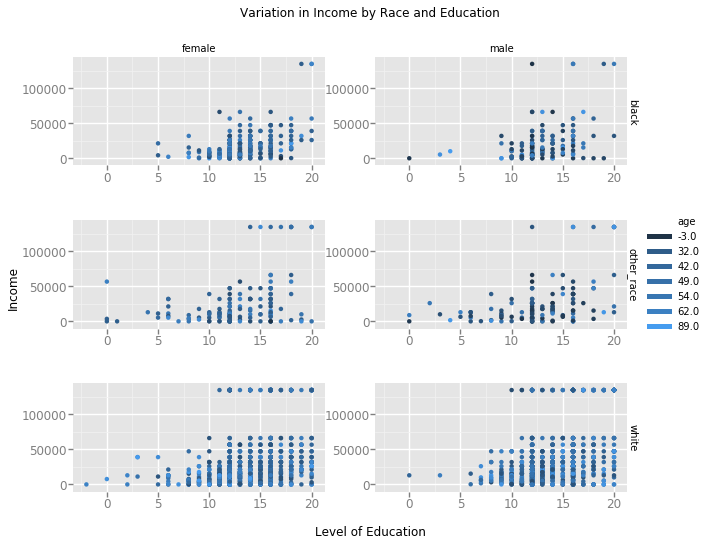

<ggplot: (-9223372029315904459)>

In [10]:
from ggplot import *

#Make a Basic Scatterplot
ggplot(aes(x='educ', y='realinc', color='age'), data=df) +\
    geom_point() +\
    xlab("Level of Education") + ylab("Income") + \
    ggtitle("Variation in Income by Race and Education") + \
    facet_grid("races", "genders")

# Simpler Scatterplot

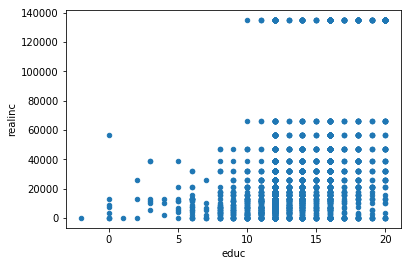

In [29]:
# Make scatterplot of education on income
# simple scatterplot using matplotlib

educ = df['educ']
income = df['realinc']
df.plot(x='educ', y='realinc', kind='scatter')
plt.show()

# Descriptive Statistics of a Variable

In [11]:
#Get Income Descriptive Stats
df['realinc'].describe()

count      2538.000000
mean      30967.563558
std       35273.990164
min          -1.000000
25%        7686.250000
50%       21285.000000
75%       39022.500000
max      134817.439900
Name: realinc, dtype: float64

# Linear Regression

### Setup Linear Regression Variables and Data

In [12]:
#Define Outcome and Independent Variables
outcome  = 'realinc'
features = ['age', 'sex', 'race', 'educ']

X, y = df[features], df[outcome]

In [13]:
X.head()

,age,sex,race,educ
0,53,1,1,16
1,26,2,1,16
2,59,1,1,13
3,56,2,1,16
4,74,2,1,17


In [14]:
y.head()

0     39022.5000
1    134817.4399
2     21285.0000
3    134817.4399
4        -1.0000
Name: realinc, dtype: float64

In [15]:
#Get Dummy Variables
X = pd.get_dummies(X, prefix=['race', 'sex'], columns=['race', 'sex'])

In [16]:
X.head()

,age,educ,race_1,race_2,race_3,sex_1,sex_2
0,53,16,1,0,0,1,0
1,26,16,1,0,0,0,1
2,59,13,1,0,0,1,0
3,56,16,1,0,0,0,1
4,74,17,1,0,0,0,1


In [17]:
#Rename Columns
cols = ['age', 'educ', 'white', 'black', 'other_race', 'male', 'female']
X.columns = cols
X.head()

,age,educ,white,black,other_race,male,female
0,53,16,1,0,0,1,0
1,26,16,1,0,0,0,1
2,59,13,1,0,0,1,0
3,56,16,1,0,0,0,1
4,74,17,1,0,0,0,1


In [18]:
#Create X Data without Reference Groups
X_vars = X[['age', 'educ', 'black', 'other_race', 'female']]
X_vars.head()

,age,educ,black,other_race,female
0,53,16,0,0,0
1,26,16,0,0,1
2,59,13,0,0,0
3,56,16,0,0,1
4,74,17,0,0,1


### Run Regression Using Statsmodels

In [19]:
import statsmodels.api as sm

X_vars = sm.add_constant(X_vars, prepend=False)
X_vars.head()

m = sm.OLS(y, X_vars)

res = m.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                realinc   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     94.90
Date:                Wed, 10 Oct 2018   Prob (F-statistic):           7.83e-92
Time:                        19:19:17   Log-Likelihood:                -29958.
No. Observations:                2538   AIC:                         5.993e+04
Df Residuals:                    2532   BIC:                         5.996e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            8.0227     37.092      0.216      0.8

### Save Prediction of Model

In [20]:
#First Rejoin Full Model Data (Including Ref Groups)
ols_df = pd.concat([y, X], axis=1)
ols_df.head()

,realinc,age,educ,white,black,other_race,male,female
0,39022.5000,53,16,1,0,0,1,0
1,134817.4399,26,16,1,0,0,0,1
2,21285.0000,59,13,1,0,0,1,0
3,134817.4399,56,16,1,0,0,0,1
4,-1.0000,74,17,1,0,0,0,1


In [21]:
#Add Model Predictions
ols_df['yhat'] = res.predict(X_vars)
ols_df.head()

,realinc,age,educ,white,black,other_race,male,female,yhat
0,39022.5000,53,16,1,0,0,1,0,45744.112700
1,134817.4399,26,16,1,0,0,0,1,39727.476647
2,21285.0000,59,13,1,0,0,1,0,33522.155108
3,134817.4399,56,16,1,0,0,0,1,39968.158807
4,-1.0000,74,17,1,0,0,0,1,44202.599444


# Creating New Variables Using a Formula

In [22]:
#Example Getting Income With a Custom Formula
def get_income(row):
    
    age = row[0]
    educ = row[1]
    
    inc = -20120+(age*8.0227)+(educ*4090.0313)
    return inc

get_income([53, 16])

45745.7039

In [23]:
ols_df['imputed_inc_by_age_educ'] = ols_df[['age', 'educ']].apply(get_income, axis=1) 

In [24]:
ols_df.head()

,realinc,age,educ,white,black,other_race,male,female,yhat,imputed_inc_by_age_educ
0,39022.5000,53,16,1,0,0,1,0,45744.112700,45745.7039
1,134817.4399,26,16,1,0,0,0,1,39727.476647,45529.0910
2,21285.0000,59,13,1,0,0,1,0,33522.155108,33523.7462
3,134817.4399,56,16,1,0,0,0,1,39968.158807,45769.7720
4,-1.0000,74,17,1,0,0,0,1,44202.599444,50004.2119


# Correlation Matrix

In [25]:
# Correction Matrix Plot
import matplotlib.pyplot as plt

ols_df = pd.concat([y, X], axis=1)
ols_df.head()


,realinc,age,educ,white,black,other_race,male,female
0,39022.5000,53,16,1,0,0,1,0
1,134817.4399,26,16,1,0,0,0,1
2,21285.0000,59,13,1,0,0,1,0
3,134817.4399,56,16,1,0,0,0,1
4,-1.0000,74,17,1,0,0,0,1


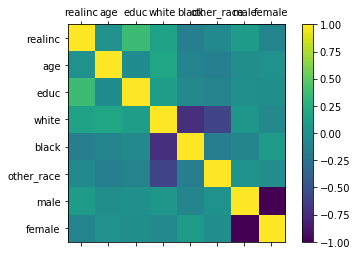

In [26]:
def corr_plot(df):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    names = df.columns
    N = len(names)
    
    correlations = df.corr()
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,N,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()
    

    
    
corr_plot(ols_df)

In [27]:
#In Matrix Form
corr = ols_df.corr()
corr.style.background_gradient()

,realinc,age,educ,white,black,other_race,male,female
realinc,1,0.0101546,0.36839,0.152164,-0.141869,-0.0506267,0.0941942,-0.0941942
age,0.0101546,1,-0.0238854,0.174609,-0.0972031,-0.13551,-0.00946811,0.00946811
educ,0.36839,-0.0238854,1,0.123603,-0.057431,-0.109354,0.00749812,-0.00749812
white,0.152164,0.174609,0.123603,1,-0.723296,-0.579439,0.0587073,-0.0587073
black,-0.141869,-0.0972031,-0.057431,-0.723296,1,-0.143693,-0.0871951,0.0871951
other_race,-0.0506267,-0.13551,-0.109354,-0.579439,-0.143693,1,0.0187786,-0.0187786
male,0.0941942,-0.00946811,0.00749812,0.0587073,-0.0871951,0.0187786,1,-1
female,-0.0941942,0.00946811,-0.00749812,-0.0587073,0.0871951,-0.0187786,-1,1
